In [1]:
from __future__ import print_function
import os
data_path = [r'C:\Users\wpghk\ai_data']

In [2]:
import numpy as np
import pandas as pd

filepath = os.sep.join(data_path + ['Iris_Data.csv'])
data = pd.read_csv(filepath)

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\wpghk\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Encode species data

In [4]:
le = LabelEncoder()
data['species'] = le.fit_transform(data.species)

In [5]:
X = data.drop('species', axis = 1)
y = data['species']

split data into X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

In [65]:
le = LabelEncoder()
data['species'] = le.fit_transform(data.species)
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()
# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.species))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'species']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'species']

데이터 특성 스케일링

In [47]:
# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

평가함수 정의

In [7]:
def print_score(classifier, X_train, y_train, X_test, y_test, train = True):
    print("-"*100)
    if train == True:
        y_pred = classifier.predict(X_train)
        print("Training result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train, y_pred)))
        print("Classification Report:\n{}\n".format(classification_report(y_train, y_pred)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train, y_pred)))
        res = cross_val_score(classifier, X_train, y_train, cv = 10, n_jobs= -1, scoring ="accuracy")
        print("Average Accuracy:\t{0:.4f}\n".format(res.mean()))
        print("Standard Deviation:\t{0:.4f}".format(res.std()))
    elif train == False:
        y_pred = classifier.predict(X_test)
        print("Test result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
        print("Classification Report:\n{}\n".format(classification_report(y_test, y_pred)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, y_pred)))

Model

    Random Forest Classifier
    Support Vector Classifier
    KNeighbors Classifier
    Naive Bayes
    Logistic Regression
    Decision Tree Classifier
   

In [18]:
random_forest = RandomForestClassifier( criterion='entropy',random_state = 42)
random_forest.fit(X_train, y_train)

svm = SVC(kernel='rbf', random_state=42, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
print_score(random_forest ,X_train,y_train,X_test,y_test, train = True)
print_score(random_forest ,X_train,y_train,X_test,y_test, train = False)

----------------------------------------------------------------------------------------------------
Training result:

Accuracy Score: 1.0000

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       1.00      1.00      1.00        27
          2       1.00      1.00      1.00        29

avg / total       1.00      1.00      1.00        90


Confusion Matrix:
[[34  0  0]
 [ 0 27  0]
 [ 0  0 29]]

Average Accuracy:	0.9542

Standard Deviation:	0.0751
----------------------------------------------------------------------------------------------------
Test result:

Accuracy Score: 0.9000

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.81      0.96      0.88        23
          2       0.94      0.76      0.84        21

avg / total       0.91      0.90      0.90        60


Confusion Matrix:
[[16  0

In [10]:
print_score(svm ,X_train,y_train,X_test,y_test, train = True)
print_score(svm ,X_train,y_train,X_test,y_test, train = False)

----------------------------------------------------------------------------------------------------
Training result:

Accuracy Score: 0.9778

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.96      0.96      0.96        27
          2       0.97      0.97      0.97        29

avg / total       0.98      0.98      0.98        90


Confusion Matrix:
[[34  0  0]
 [ 0 26  1]
 [ 0  1 28]]

Average Accuracy:	0.9778

Standard Deviation:	0.0667
----------------------------------------------------------------------------------------------------
Test result:

Accuracy Score: 0.9333

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.88      0.96      0.92        23
          2       0.95      0.86      0.90        21

avg / total       0.94      0.93      0.93        60


Confusion Matrix:
[[16  0

In [11]:
print_score(knn ,X_train,y_train,X_test,y_test, train = True)
print_score(knn ,X_train,y_train,X_test,y_test, train = False)

----------------------------------------------------------------------------------------------------
Training result:

Accuracy Score: 0.9889

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       1.00      0.96      0.98        27
          2       0.97      1.00      0.98        29

avg / total       0.99      0.99      0.99        90


Confusion Matrix:
[[34  0  0]
 [ 0 26  1]
 [ 0  0 29]]

Average Accuracy:	0.9653

Standard Deviation:	0.0728
----------------------------------------------------------------------------------------------------
Test result:

Accuracy Score: 0.9333

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.88      0.96      0.92        23
          2       0.95      0.86      0.90        21

avg / total       0.94      0.93      0.93        60


Confusion Matrix:
[[16  0

In [16]:
print_score(gnb ,X_train,y_train,X_test,y_test, train = True)
print_score(gnb ,X_train,y_train,X_test,y_test, train = False)
print_score(bnb ,X_train,y_train,X_test,y_test, train = True)
print_score(bnb ,X_train,y_train,X_test,y_test, train = False)
print_score(mnb ,X_train,y_train,X_test,y_test, train = True)
print_score(mnb ,X_train,y_train,X_test,y_test, train = False)

----------------------------------------------------------------------------------------------------
Training result:

Accuracy Score: 0.9778

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       1.00      0.93      0.96        27
          2       0.94      1.00      0.97        29

avg / total       0.98      0.98      0.98        90


Confusion Matrix:
[[34  0  0]
 [ 0 25  2]
 [ 0  0 29]]

Average Accuracy:	0.9764

Standard Deviation:	0.0473
----------------------------------------------------------------------------------------------------
Test result:

Accuracy Score: 0.9333

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.85      1.00      0.92        23
          2       1.00      0.81      0.89        21

avg / total       0.94      0.93      0.93        60


Confusion Matrix:
[[16  0

C:\Users\wpghk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Average Accuracy:	0.3779

Standard Deviation:	0.0324
----------------------------------------------------------------------------------------------------
Test result:

Accuracy Score: 0.2667

Classification Report:
             precision    recall  f1-score   support

          0       0.27      1.00      0.42        16
          1       0.00      0.00      0.00        23
          2       0.00      0.00      0.00        21

avg / total       0.07      0.27      0.11        60


Confusion Matrix:
[[16  0  0]
 [23  0  0]
 [21  0  0]]

----------------------------------------------------------------------------------------------------
Training result:

Accuracy Score: 0.9000

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       1.00      0.67      0.80        27
          2       0.76      1.00      0.87        29

avg / total       0.92      0.90      0.90        90


Confusion Matrix:
[[34  0

C:\Users\wpghk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Average Accuracy:	0.8910

Standard Deviation:	0.0816
----------------------------------------------------------------------------------------------------
Test result:

Accuracy Score: 0.8833

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.70      0.82        23
          2       0.75      1.00      0.86        21

avg / total       0.91      0.88      0.88        60


Confusion Matrix:
[[16  0  0]
 [ 0 16  7]
 [ 0  0 21]]



In [54]:
print_score(logreg ,X_train,y_train,X_test,y_test, train = True)
print_score(logreg ,X_train,y_train,X_test,y_test, train = False)

----------------------------------------------------------------------------------------------------
Training result:

Accuracy Score: 0.9619

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        35
          1       0.97      0.91      0.94        35
          2       0.92      0.97      0.94        35

avg / total       0.96      0.96      0.96       105


Confusion Matrix:
[[35  0  0]
 [ 0 32  3]
 [ 0  1 34]]

Average Accuracy:	0.9583

Standard Deviation:	0.0716
----------------------------------------------------------------------------------------------------
Test result:

Accuracy Score: 0.9111

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      0.73      0.85        15
          2       0.79      1.00      0.88        15

avg / total       0.93      0.91      0.91        45


Confusion Matrix:
[[15  0

In [17]:
print_score(dt ,X_train,y_train,X_test,y_test, train = True)
print_score(dt ,X_train,y_train,X_test,y_test, train = False)
dt.tree_.node_count, dt.tree_.max_depth

----------------------------------------------------------------------------------------------------
Training result:

Accuracy Score: 1.0000

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       1.00      1.00      1.00        27
          2       1.00      1.00      1.00        29

avg / total       1.00      1.00      1.00        90


Confusion Matrix:
[[34  0  0]
 [ 0 27  0]
 [ 0  0 29]]

Average Accuracy:	0.9542

Standard Deviation:	0.0751
----------------------------------------------------------------------------------------------------
Test result:

Accuracy Score: 0.9500

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.92      0.96      0.94        23
          2       0.95      0.90      0.93        21

avg / total       0.95      0.95      0.95        60


Confusion Matrix:
[[16  0

(9, 4)

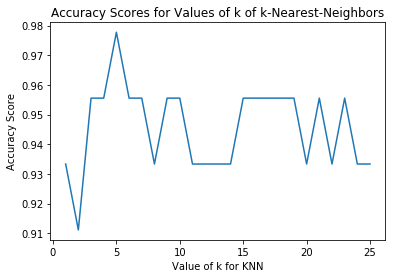

In [56]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of model')
plt.show()


In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABR = AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=0.1, n_estimators=200)

ABR= ABR.fit(X_train, y_train)

y_pred = ABR.predict(X_test)
pred_df = pd.DataFrame(y_pred)

pred_df.to_csv("output.csv", mode='w')
# End of Demo


print_score(ABR ,X_train,y_train,X_test,y_test, train = True)
print_score(ABR ,X_train,y_train,X_test,y_test, train = False)

----------------------------------------------------------------------------------------------------
Training result:

Accuracy Score: 1.0000

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       1.00      1.00      1.00        27
          2       1.00      1.00      1.00        29

avg / total       1.00      1.00      1.00        90


Confusion Matrix:
[[34  0  0]
 [ 0 27  0]
 [ 0  0 29]]

Average Accuracy:	0.9653

Standard Deviation:	0.0728
----------------------------------------------------------------------------------------------------
Test result:

Accuracy Score: 0.9333

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.88      0.96      0.92        23
          2       0.95      0.86      0.90        21

avg / total       0.94      0.93      0.93        60


Confusion Matrix:
[[16  0

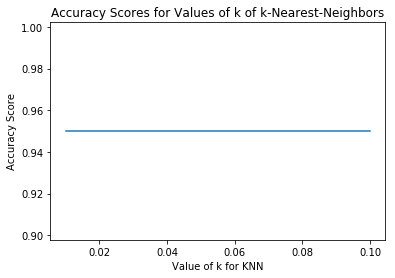

In [14]:
k_range = [0.01,0.02,0.03,0.04,0.05, 0.06, 0.07, 0.08, 0.09, 0.10]
scores = []
for k in k_range:
    ABR = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=k, n_estimators=200)
    ABR= ABR.fit(X_train, y_train)
    y_pred = ABR.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()


In [13]:
from sklearn.ensemble import VotingClassifier,  AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

ABR = AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=0.1, n_estimators=200)
ABD = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=200)
SVM = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0, probability = True)


VC = VotingClassifier(estimators=[('lr', ABR), ('rf', ABD), ('svc', SVM)], voting='soft', weights=[1,1,2])
VC.fit(X_train, y_train)

y_pred = VC.predict(X_test)
pred_df = pd.DataFrame(y_pred)



print_score(VC ,X_train,y_train,X_test,y_test, train = True)
print_score(VC ,X_train,y_train,X_test,y_test, train = False)

C:\Users\wpghk\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\wpghk\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


----------------------------------------------------------------------------------------------------
Training result:

Accuracy Score: 1.0000

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       1.00      1.00      1.00        27
          2       1.00      1.00      1.00        29

avg / total       1.00      1.00      1.00        90


Confusion Matrix:
[[34  0  0]
 [ 0 27  0]
 [ 0  0 29]]

Average Accuracy:	0.9653

Standard Deviation:	0.0728
----------------------------------------------------------------------------------------------------
Test result:

Accuracy Score: 0.9500

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.92      0.96      0.94        23
          2       0.95      0.90      0.93        21

avg / total       0.95      0.95      0.95        60


Confusion Matrix:
[[16  0

C:\Users\wpghk\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [12]:

from sklearn.ensemble import GradientBoostingClassifier

gdbc = GradientBoostingClassifier(random_state = 42)
gdbc.fit(X_train, y_train)
print_score(mnb ,X_train,y_train,X_test,y_test, train = True)
print_score(mnb ,X_train,y_train,X_test,y_test, train = False)

----------------------------------------------------------------------------------------------------
Training result:

Accuracy Score: 0.9000

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       1.00      0.67      0.80        27
          2       0.76      1.00      0.87        29

avg / total       0.92      0.90      0.90        90


Confusion Matrix:
[[34  0  0]
 [ 0 18  9]
 [ 0  0 29]]

Average Accuracy:	0.8910

Standard Deviation:	0.0816
----------------------------------------------------------------------------------------------------
Test result:

Accuracy Score: 0.8833

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.70      0.82        23
          2       0.75      1.00      0.86        21

avg / total       0.91      0.88      0.88        60


Confusion Matrix:
[[16  0